# ZigZag API Demonstration: 
## A hardware architecture comparison demo
In this demo, we use ZigZag to optimize the mapping of AlexNet onto a TPU-like architecture.
Any ONNX model can be supplied, alongside an already implemented architecture, or a custom architecture, wich we don't get into in this first demonstration.


In [4]:
# Load in the AlexNet ONNX model. (taken from onnx model zoo)
import onnx
onnx_model_path = "alexnet.onnx"
onnx_model = onnx.load(onnx_model_path, load_external_data=False)

Next, we evaluate the hardware performance (in terms of energy (pJ) and latency (cycles)) of different accelerator architectures by calling the ZigZag API with standard-included architectures:

- TPU
- Edge TPU
- Tesla NPU
- Meta Prototype

In [5]:
from zigzag.api import get_hardware_performance
from zigzag.inputs.examples.mapping.alexnet_on_tpu_like import mapping as mapping_tpu
from zigzag.inputs.examples.mapping.alexnet_on_edge_tpu_like import mapping as mapping_edge_tpu
from zigzag.inputs.examples.mapping.alexnet_on_tesla_npu import mapping as mapping_tesla_npu
from zigzag.inputs.examples.mapping.alexnet_on_meta_prototype import mapping as mapping_meta_prototype


# List of hardware architectures we run our experiment for
hardwares = ["tpu", "edge-tpu", "tesla-npu", "meta-prototype"]
# List of mappings for each hardware (encodes the spatial dataflow)
mappings = [mapping_tpu, mapping_edge_tpu, mapping_tesla_npu, mapping_meta_prototype]

cmes = []
for (hardware, mapping) in zip(hardwares, mappings):
    # Pickle filename to save list of cmes
    pickle_filename = "outputs/list_of_cmes.pickle"
    # Call the zigzag api, using a provided accelerator and mapping
    # energy, latency = get_hardware_performance(onnx_model, accelerator, mapping)
    energy, latency, cme = get_hardware_performance(onnx_model, hardware, mapping=mapping, opt='latency', pickle_filename=pickle_filename)
    print(f"Total onnx model (energy, latency) performance = ({energy:.3e}, {latency:.3e}).")
    cmes.append(cme)

2022-11-06 23:42:17,296 - generate_layer_node_for_conv +171 - INFO - Parsed convolutional node 
2022-11-06 23:42:17,298 - generate_layer_node_for_conv +171 - INFO - Parsed convolutional node 
2022-11-06 23:42:17,300 - generate_layer_node_for_conv +171 - INFO - Parsed convolutional node 
2022-11-06 23:42:17,301 - generate_layer_node_for_conv +171 - INFO - Parsed convolutional node 
2022-11-06 23:42:17,303 - generate_layer_node_for_conv +171 - INFO - Parsed convolutional node 
2022-11-06 23:42:17,305 - generate_layer_node_for_gemm +91 - INFO - Parsed Gemm node 
2022-11-06 23:42:17,306 - generate_layer_node_for_gemm +91 - INFO - Parsed Gemm node 
2022-11-06 23:42:17,308 - generate_layer_node_for_gemm +91 - INFO - Parsed Gemm node 
2022-11-06 23:42:17,309 - parse_workload_from_onnx_model_and_mapping +101 - INFO - Created ONNXWorkload graph with 24 nodes and 23 edges.
2022-11-06 23:42:17,312 - parse_accelerator_from_path +56 - INFO - Parsed accelerator with cores [1].
2022-11-06 23:42:17,31

Total onnx model (energy, latency) performance = (5.571e+09, 9.078e+06).


720it [00:01, 518.09it/s]
2022-11-06 23:42:55,922 - run +40 - INFO - Saved CME with energy 6.628e+07 and latency 3.409e+05 to outputs/2022-11-06T23-42-55.921048.json.
2022-11-06 23:42:55,923 - run +29 - INFO - Processing layer ...
2022-11-06 23:42:55,925 - run +80 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 8), 'D2': ('C', 8), 'D3': ('OX', 4), 'D4': ('OY', 4)}.
100%|██████████| 5040/5040 [00:10<00:00, 462.89it/s]
2022-11-06 23:43:06,819 - run +40 - INFO - Saved CME with energy 9.223e+07 and latency 2.684e+05 to outputs/2022-11-06T23-43-06.817843.json.
2022-11-06 23:43:06,821 - run +29 - INFO - Processing layer ...
2022-11-06 23:43:06,822 - run +80 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 8), 'D2': ('C', 8), 'D3': ('OX', 4), 'D4': ('OY', 4)}.
100%|██████████| 720/720 [00:01<00:00, 523.94it/s]
2022-11-06 23:43:08,202 - run +40 - INFO - Saved CME with energy 1.224e+08 and latency 1.372e+05 to outputs/2022-11-06T23-43-08.200641.json.
2022-11-06 23:43:08,204 - run +29 -

Total onnx model (energy, latency) performance = (5.665e+09, 8.257e+06).


100%|██████████| 720/720 [00:01<00:00, 471.25it/s]
2022-11-06 23:43:32,255 - run +40 - INFO - Saved CME with energy 6.121e+07 and latency 1.630e+05 to outputs/2022-11-06T23-43-32.254349.json.
2022-11-06 23:43:32,256 - run +29 - INFO - Processing layer ...
2022-11-06 23:43:32,256 - run +80 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 32), 'D2': ('OX', 8), 'D3': ('OY', 4)}.
100%|██████████| 5040/5040 [00:10<00:00, 479.73it/s]
2022-11-06 23:43:42,768 - run +40 - INFO - Saved CME with energy 8.031e+07 and latency 3.131e+05 to outputs/2022-11-06T23-43-42.767096.json.
2022-11-06 23:43:42,770 - run +29 - INFO - Processing layer ...
2022-11-06 23:43:42,770 - run +80 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 32), 'D2': ('OX', 8), 'D3': ('OY', 4)}.
100%|██████████| 720/720 [00:01<00:00, 488.80it/s]
2022-11-06 23:43:44,250 - run +40 - INFO - Saved CME with energy 1.163e+08 and latency 2.834e+05 to outputs/2022-11-06T23-43-44.249009.json.
2022-11-06 23:43:44,251 - run +29 - INFO

Total onnx model (energy, latency) performance = (6.071e+09, 8.398e+06).


100%|██████████| 720/720 [00:01<00:00, 507.91it/s]
2022-11-06 23:44:07,143 - run +40 - INFO - Saved CME with energy 5.559e+07 and latency 2.054e+05 to outputs/2022-11-06T23-44-07.142256.json.
2022-11-06 23:44:07,144 - run +29 - INFO - Processing layer ...
2022-11-06 23:44:07,145 - run +80 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 32), 'D2': ('C', 2), 'D3': ('OX', 4), 'D4': ('OY', 4)}.
100%|██████████| 5040/5040 [00:10<00:00, 470.49it/s]
2022-11-06 23:44:17,863 - run +40 - INFO - Saved CME with energy 5.838e+07 and latency 2.801e+05 to outputs/2022-11-06T23-44-17.862011.json.
2022-11-06 23:44:17,865 - run +29 - INFO - Processing layer ...
2022-11-06 23:44:17,865 - run +80 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 32), 'D2': ('C', 2), 'D3': ('OX', 4), 'D4': ('OY', 4)}.
100%|██████████| 720/720 [00:01<00:00, 451.45it/s]
2022-11-06 23:44:19,466 - run +40 - INFO - Saved CME with energy 1.183e+08 and latency 2.419e+05 to outputs/2022-11-06T23-44-19.465535.json.
2022-11-

Total onnx model (energy, latency) performance = (5.757e+09, 8.312e+06).


### Visualizing the results
Inside the repo, we have provided a visualization script, that can automatically visualize these best "cost model evaluations" found by ZigZag.

We use the generated list of cost model evaluations (representing the total AlexNet performance for each architecture) from the previous step to visualize the energy and latency distribution across architectures.


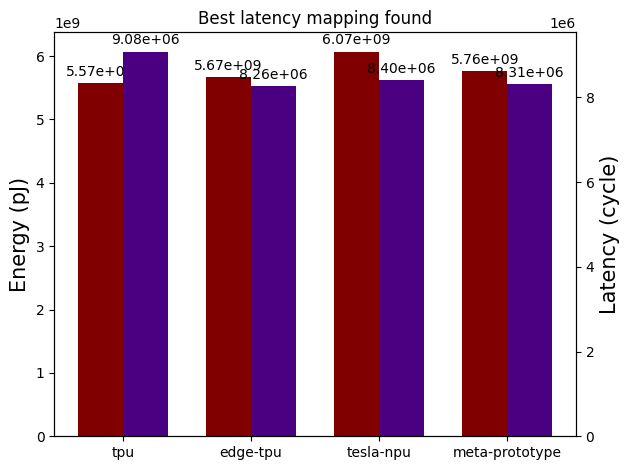

In [6]:
from zigzag.visualization.results.plot_cme import bar_plot_cost_model_evaluations_total

bar_plot_cost_model_evaluations_total(cmes, labels=hardwares, fig_title="Best latency mapping found", save_path="plot_total.png")